In [7]:
import pandas as pd
import numpy as np

In [8]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 200)

In [9]:
raw_df = pd.read_csv("../data/raw/datasheet.csv")

In [12]:
print(raw_df.columns)

Index(['brand', 'name', 'type', 'country', 'ingridients', 'afterUse'], dtype='object')


In [10]:
raw_df.head()


,brand,name,type,country,ingridients,afterUse
0,The Ordinary,Glycolic Acid 7% Toning Solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Water,Centaurea Cyanus Flower Water,Aloe Barbadensis Leaf Water,Propanediol,Glycerin,Triethanolamine,Aminomethyl Propanol,Panax Ginseng Root Extract,Tasma...","Good For Oily Skin,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating,Rosacea"
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,Face Cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexanoate,Propylene Glycol,Ammonium Polyacryloyldimethyl Taurate,Polysorbate 60,Ceramide NP,Niacinamide,Sodium Chloride,Coco-Betaine,Disodium EDTA,Caprylyl...","Good For Oily Skin,Redness Reducing,Reduces Irritation,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger"
2,The Ordinary,Niacinamide 10% + Zinc 1%,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Dimethyl Isosorbide,Tamarindus Indica Seed Gum,Xanthan Gum,Isoceteth-20,Ethoxydiglycol,Phenoxyethanol,Chlorphenesin","Good For Oily Skin,Redness Reducing,Acne Fighting,Brightening,Irritating"
3,Youth To The People,Superfood Antioxidant Cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Cocoyl Glutamate,Sorbeth-230 Tetraoleate,Polysorbate 20,Sodium Chloride,Aloe Barbadensis Leaf Juice Powder,Brassica Oleracea Acephala Leaf Extract,Spina...","Redness Reducing,Reduces Irritation,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating"
4,COSRX,Low pH Good Morning Gel Cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Methyl Isethionate,Sodium Chloride,Polysorbate 20,Styrax Japonicus Branch/Fruit/Leaf Extract,Butylene Glycol,Saccharomyces Ferment,Cryptomeria Japonica ...","Good For Oily Skin,Reduces Irritation,Reduces Large Pores,Drying,Acne Trigger,Irritating"


# 1. Raw Product Data – Exploration & Cleaning

- Exploring the raw product dataset, identify data quality issues, and produce a cleaned version for downstream analysis down the line... i was also thinking too much inside my head.... so i will start here and see what is the next possible action and what is reachable for this project. Scope wise , as a single student. 

In [13]:
df = raw_df.copy()


## Column Renaming Semantics

Some column names in the raw dataset are ambiguous or inconsistent with
skincare industry terminology. To improve clarity while preserving data
provenance, columns are renamed only in the working copy of the dataset.


In [15]:
df = df.rename(columns={
    "ingridients": "inci_raw",
    "afterUse": "claimed_concerns_raw"
})


In [22]:
print(df.columns)
print(df.shape)


Index(['brand', 'name', 'type', 'country', 'inci_raw', 'claimed_concerns_raw'], dtype='object')
(19050, 6)


In [24]:
df.head()

,brand,name,type,country,inci_raw,claimed_concerns_raw
0,The Ordinary,Glycolic Acid 7% Toning Solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Water,Centaurea Cyanus Flower Water,Aloe Barbadensis Leaf Water,Propanediol,Glycerin,Triethanolamine,Aminomethyl Propanol,Panax Ginseng Root Extract,Tasma...","Good For Oily Skin,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating,Rosacea"
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,Face Cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexanoate,Propylene Glycol,Ammonium Polyacryloyldimethyl Taurate,Polysorbate 60,Ceramide NP,Niacinamide,Sodium Chloride,Coco-Betaine,Disodium EDTA,Caprylyl...","Good For Oily Skin,Redness Reducing,Reduces Irritation,Anti-Aging,Acne Fighting,Brightening,Drying,Acne Trigger"
2,The Ordinary,Niacinamide 10% + Zinc 1%,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Dimethyl Isosorbide,Tamarindus Indica Seed Gum,Xanthan Gum,Isoceteth-20,Ethoxydiglycol,Phenoxyethanol,Chlorphenesin","Good For Oily Skin,Redness Reducing,Acne Fighting,Brightening,Irritating"
3,Youth To The People,Superfood Antioxidant Cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Cocoyl Glutamate,Sorbeth-230 Tetraoleate,Polysorbate 20,Sodium Chloride,Aloe Barbadensis Leaf Juice Powder,Brassica Oleracea Acephala Leaf Extract,Spina...","Redness Reducing,Reduces Irritation,Skin Texture,Reduces Large Pores,Anti-Aging,Dark Spots,Brightening,Drying,Acne Trigger,Irritating"
4,COSRX,Low pH Good Morning Gel Cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Methyl Isethionate,Sodium Chloride,Polysorbate 20,Styrax Japonicus Branch/Fruit/Leaf Extract,Butylene Glycol,Saccharomyces Ferment,Cryptomeria Japonica ...","Good For Oily Skin,Reduces Irritation,Reduces Large Pores,Drying,Acne Trigger,Irritating"


## Column-Level Overview
This section explores each column individually to understand cardinality,
missing values, and semantic relevance before any transformations.


In [25]:
column_overview = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.values,
    "non_null_count": df.notna().sum().values,
    "null_count": df.isna().sum().values,
    "unique_values": df.nunique().values
})

column_overview.sort_values("unique_values", ascending=False)


,column,dtype,non_null_count,null_count,unique_values
1,name,object,19050,0,18688
4,inci_raw,object,18731,319,18171
5,claimed_concerns_raw,object,17526,1524,2970
0,brand,object,19050,0,2224
3,country,object,17218,1832,70
2,type,object,19035,15,36


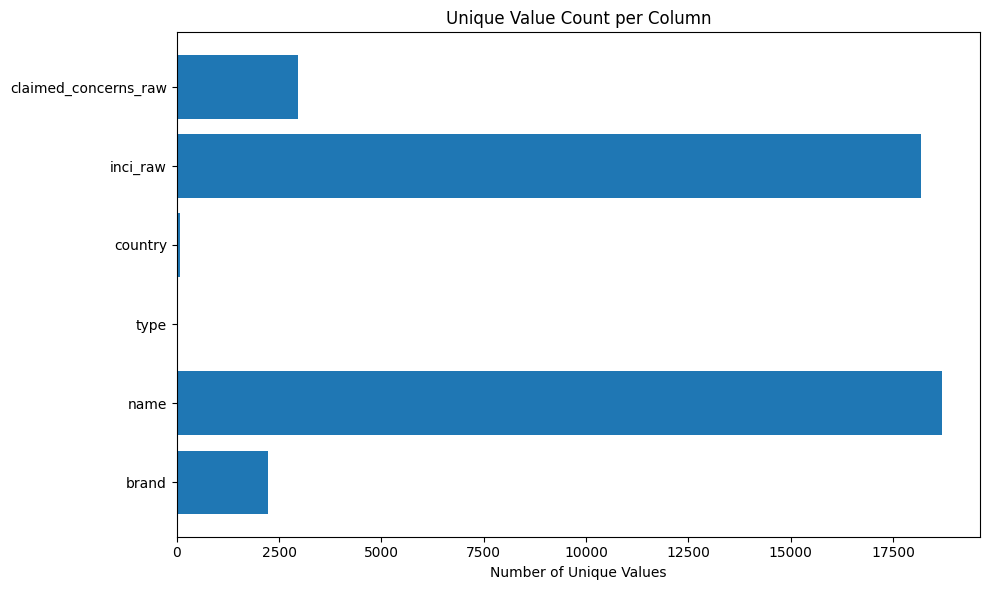

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(column_overview["column"], column_overview["unique_values"])
plt.xlabel("Number of Unique Values")
plt.title("Unique Value Count per Column")
plt.tight_layout()
plt.show()


## Product Type Exploration
This section explores the `type` column to understand how products
are categorized in the raw dataset.


In [29]:
df["type"].value_counts(dropna=False)


type
Serum                  2345
General Moisturizer    2149
Face Cleanser          1768
Sunscreen              1286
Bath & Body            1134
Toner                   967
Facial Treatment        861
Face Makeup             818
Eye Moisturizer         662
Exfoliator              586
Makeup Remover          564
Wet Mask                559
Sheet Mask              550
Other Haircare          460
Lip Moisturizer         421
Eye Makeup              416
Day Moisturizer         354
Oil                     354
Night Moisturizer       321
Essence                 298
Shampoo                 295
Tool                    250
Overnight Mask          198
Lip Makeup              191
Conditioner             184
Fragrance               169
Hand Care               156
Eye Mask                121
Makeup Applicator       115
Nail Care               110
Cheek Makeup            106
Tanning                 104
Lip Mask                 94
Emulsion                 65
NaN                      15
False Eyelash  

In [30]:
df["type"].nunique()


36

In [32]:
SKINCARE_TYPES = [
    "Serum",
    "General Moisturizer",
    "Day Moisturizer",
    "Night Moisturizer",
    "Eye Moisturizer",
    "Face Cleanser",
    "Toner",
    "Essence",
    "Emulsion",
    "Facial Treatment",
    "Exfoliator",
    "Oil",
    "Sunscreen",
    "Overnight Mask",
    "Wet Mask",
    "Sheet Mask",
    "Eye Mask",
    "Lip Moisturizer",
    "Lip Mask"
]


In [33]:
df = df[df["type"].isin(SKINCARE_TYPES)].copy()

In [37]:
df["type"].value_counts()



type
Serum                  2345
General Moisturizer    2149
Face Cleanser          1768
Sunscreen              1286
Toner                   967
Facial Treatment        861
Eye Moisturizer         662
Exfoliator              586
Wet Mask                559
Sheet Mask              550
Lip Moisturizer         421
Day Moisturizer         354
Oil                     354
Night Moisturizer       321
Essence                 298
Overnight Mask          198
Eye Mask                121
Lip Mask                 94
Emulsion                 65
Name: count, dtype: int64

In [38]:
df.shape

(13959, 6)

In [39]:
CORE_SKINCARE_TYPES = [
    "Serum",
    "General Moisturizer",
    "Day Moisturizer",
    "Night Moisturizer",
    "Eye Moisturizer",
    "Face Cleanser",
    "Toner",
    "Exfoliator",
    "Sunscreen"
]


In [40]:
df = df[df["type"].isin(CORE_SKINCARE_TYPES)].copy()


In [41]:
df["type"].value_counts()


type
Serum                  2345
General Moisturizer    2149
Face Cleanser          1768
Sunscreen              1286
Toner                   967
Eye Moisturizer         662
Exfoliator              586
Day Moisturizer         354
Night Moisturizer       321
Name: count, dtype: int64

In [42]:
df.shape


(10438, 6)

In [ ]:

# CORE skincare filter
df_core = df[df["type"].isin(CORE_SKINCARE_TYPES)]

# Aantallen
print("Totaal aantal producten:", len(df))
print("CORE skincare producten:", len(df_core))

print("\nVerdeling per type:")
print(df_core["type"].value_counts())


Totaal aantal producten: 19050
CORE skincare producten: 7268

Verdeling per type:
type
Serum                  2345
General Moisturizer    2149
Facial Treatment        861
Exfoliator              586
Day Moisturizer         354
Oil                     354
Night Moisturizer       321
Essence                 298
Name: count, dtype: int64


In [ ]:
df['type']['Makeup Remover']

KeyError: 'Makeup Remover'

In [ ]:
CORE_SKINCARE_TYPES = [
    # Cleansing
    "Face Cleanser",
    "Makeup Remover",

    # Leave-on core
    "Serum",
    "General Moisturizer",
    "Day Moisturizer",
    "Night Moisturizer",
    "Eye Moisturizer",
    "Facial Treatment",
    "Exfoliator",
    "Toner",
    "Essence",
    "Emulsion",
    "Oil",

    # Protection
    "Sunscreen",

    # Masks (onderscheid behouden)
    "Wet Mask",
    "Sheet Mask",
    "Overnight Mask",
    "Eye Mask",

    # Lip / hand care
    "Lip Moisturizer",
    "Lip Mask",
    "Hand Care"
]


In [ ]:
import pandas as pd

df = pd.read_csv("datasheet.csv")  # pas pad aan

df_core = df[df["type"].isin(CORE_SKINCARE_TYPES)]

print("Totaal aantal producten:", len(df))
print("CORE skincare producten:", len(df_core))

print("\nVerdeling per type:")
print(df_core["type"].value_counts())

# Sanity check
print("\nUnieke types in CORE:")
print(sorted(df_core["type"].unique()))


Totaal aantal producten: 19050
CORE skincare producten: 14679

Verdeling per type:
type
Serum                  2345
General Moisturizer    2149
Face Cleanser          1768
Sunscreen              1286
Toner                   967
Facial Treatment        861
Eye Moisturizer         662
Exfoliator              586
Makeup Remover          564
Wet Mask                559
Sheet Mask              550
Lip Moisturizer         421
Day Moisturizer         354
Oil                     354
Night Moisturizer       321
Essence                 298
Overnight Mask          198
Hand Care               156
Eye Mask                121
Lip Mask                 94
Emulsion                 65
Name: count, dtype: int64

Unieke types in CORE:
['Day Moisturizer', 'Emulsion', 'Essence', 'Exfoliator', 'Eye Mask', 'Eye Moisturizer', 'Face Cleanser', 'Facial Treatment', 'General Moisturizer', 'Hand Care', 'Lip Mask', 'Lip Moisturizer', 'Makeup Remover', 'Night Moisturizer', 'Oil', 'Overnight Mask', 'Serum', 'Sheet Mas

In [ ]:
df_core.head()

,brand,name,type,country,ingridients,afterUse
0,The Ordinary,Glycolic Acid 7% Toning Solution,Toner,Canada,"Water,Glycolic Acid,Rosa Damascena Flower Wate...","Good For Oily Skin,Skin Texture,Reduces Large ..."
1,La Roche-Posay,Toleriane Hydrating Gentle Face Cleanser,Face Cleanser,France,"Water,Glycerin,Pentaerythrityl Tetraethylhexan...","Good For Oily Skin,Redness Reducing,Reduces Ir..."
2,The Ordinary,Niacinamide 10% + Zinc 1%,Facial Treatment,Canada,"Water,Niacinamide,Pentylene Glycol,Zinc PCA,Di...","Good For Oily Skin,Redness Reducing,Acne Fight..."
3,Youth To The People,Superfood Antioxidant Cleanser,Face Cleanser,United States,"Water,Cocamidopropyl Hydroxysultaine,Sodium Co...","Redness Reducing,Reduces Irritation,Skin Textu..."
4,COSRX,Low pH Good Morning Gel Cleanser,Face Cleanser,South Korea,"Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...","Good For Oily Skin,Reduces Irritation,Reduces ..."


In [ ]:


# 1. Pak de kolom 'ingridients', gooi lege rijen weg en zet alles om naar string
raw_ingredients = df_core['ingridients'].dropna().astype(str)

# 2. Splits de komma-gescheiden teksten naar individuele woorden en 'flatten' de lijst
# We gebruiken strip() om spaties rondom de namen te verwijderen
all_ingredients = [ing.strip() for sublist in raw_ingredients.str.split(',') for ing in sublist]

# 3. Maak de lijst uniek (zodat je niet 500x 'Water' checkt)
unique_ingredients = sorted(list(set(all_ingredients)))

# 4. Print het resultaat als één lange tekst gescheiden door komma's (klaar voor de Checker)
print(", ".join(unique_ingredients))

# Optioneel: Print hoeveel het er zijn
print(f"\nTotaal aantal unieke ingrediënten: {len(unique_ingredients)}")

1, 1-Methylhydantoin-2-Imide, 10-Decanediol, 10-Hydroxydecanoic Acid, 10-Hydroxydecenoic Acid, 2, 2-(2-Aminoethoxy)Ethanol, 2-Aminobutanol, 2-Bromo-2-Nitropropane-1, 2-Butanediol, 2-Dimethylhydrocinnamal, 2-Ethylhexylal, 2-Hexanediol, 2-Hexanediol 10%, 2-Hexanediol 19%, 2-Hexanediol 2%, 2-Hexanol, 2-Hydroxyethyl Acrylate, 2-Hydroxyethyl Acrylate 1%, 2-Hydroxyethyl Picramic Acid, 2-Hydroxypropyl Acrylate, 2-Methyl 5-Cyclohexylpentanol, 2-Methylbutyric Acid, 2-Methylresorcinol, 2-O-Ethyl Ascorbic Acid, 2-Oleamido-1, 3-Aminopropane Sulfonic Acid, 3-Butanediol, 3-Diol, 3-Dioxane, 3-Ethylphenol, 3-Glyceryl Ascorbate, 3-Hexenol, 3-Hydroxybenzoic Acid, 3-Methyl-Gamma-Octalactone, 3-O-Cetyl Ascorbic Acid, 3-O-Ethyl Ascorbic Acid, 3-Octadecanediol, 3-Pentanediol, 4, 4-Butylresorcinol, 4-Dicarboxylate, 4-Dimethyl-3-Cyclohexene Carboxaldehyde, 4-Hydroxybenzoic Acid, 4-Hydroxybutyl Acrylate, 4-Methylbenzylidene Camphor, 4-Methylbenzylidene Camphor 2%, 4-Methylbenzylidene Camphor 2.5%, 4-T-Butylcyc

In [ ]:
import pandas as pd

# 1. Pak de kolom 'ingridients', gooi lege rijen weg en zet alles om naar string
raw_ingredients = df_core['ingridients'].dropna().astype(str)

# 2. Splits de komma-gescheiden teksten naar individuele woorden en 'flatten' de lijst
all_ingredients = [ing.strip() for sublist in raw_ingredients.str.split(',') for ing in sublist]

# 3. Maak de lijst uniek en sorteer deze
unique_ingredients = sorted(list(set(all_ingredients)))

# --- NIEUW: Selecteer de eerste 500 ---
top_500_ingredients = unique_ingredients[:500]

# 4. Print het resultaat (klaar voor de Paula's Choice Checker)
print(", ".join(top_500_ingredients))

# Check voor jezelf hoeveel het er zijn
print(f"\nSelectie klaar: {len(top_500_ingredients)} ingrediënten geprint.")

1, 1-Methylhydantoin-2-Imide, 10-Decanediol, 10-Hydroxydecanoic Acid, 10-Hydroxydecenoic Acid, 2, 2-(2-Aminoethoxy)Ethanol, 2-Aminobutanol, 2-Bromo-2-Nitropropane-1, 2-Butanediol, 2-Dimethylhydrocinnamal, 2-Ethylhexylal, 2-Hexanediol, 2-Hexanediol 10%, 2-Hexanediol 19%, 2-Hexanediol 2%, 2-Hexanol, 2-Hydroxyethyl Acrylate, 2-Hydroxyethyl Acrylate 1%, 2-Hydroxyethyl Picramic Acid, 2-Hydroxypropyl Acrylate, 2-Methyl 5-Cyclohexylpentanol, 2-Methylbutyric Acid, 2-Methylresorcinol, 2-O-Ethyl Ascorbic Acid, 2-Oleamido-1, 3-Aminopropane Sulfonic Acid, 3-Butanediol, 3-Diol, 3-Dioxane, 3-Ethylphenol, 3-Glyceryl Ascorbate, 3-Hexenol, 3-Hydroxybenzoic Acid, 3-Methyl-Gamma-Octalactone, 3-O-Cetyl Ascorbic Acid, 3-O-Ethyl Ascorbic Acid, 3-Octadecanediol, 3-Pentanediol, 4, 4-Butylresorcinol, 4-Dicarboxylate, 4-Dimethyl-3-Cyclohexene Carboxaldehyde, 4-Hydroxybenzoic Acid, 4-Hydroxybutyl Acrylate, 4-Methylbenzylidene Camphor, 4-Methylbenzylidene Camphor 2%, 4-Methylbenzylidene Camphor 2.5%, 4-T-Butylcyc

In [ ]:
from collections import Counter

# Alle ingrediënten uit alle producten in één grote lijst
all_items = [ing.strip() for sublist in df['ingridients'].str.split(',') for ing in sublist]

# Tel hoe vaak elk ingrediënt voorkomt
counts = Counter(all_items)

# Bekijk de top 20
print(counts.most_common(20))

TypeError: 'float' object is not iterable